In [1]:
import torch
import time
import torchviz

from mesh_dataset import MeshDataset
from torch.utils.data import DataLoader
from gnn_simplification_model import GNNSimplificationMesh
from loss.loss import total_loss
from tqdm import tqdm

Starting epoch 1


Iterate data:   0%|          | 0/1 [00:00<?, ?it/s]

init input :  0.008976936340332031
gnn_model l1 :  0.5106477737426758
gnn_model l2 :  0.000997304916381836
gnn_model l3 :  0.0009963512420654297
gnn_model :  0.5545287132263184
multinomial :  0.002991914749145508
knn simple :  0.000997781753540039
simple devconv :  0.0009975433349609375
sparse attention edge predictor :  0.0
face candidate :  0.0
triangle indexes :  0.010970115661621094
traingle node :  0.0
first p init :  0.0
barycenter :  0.0
knn :  0.005984306335449219
r matrix :  0.000997304916381836
mlp :  0.006981372833251953
selected triangles topk :  0.0009970664978027344
loss :  0.0


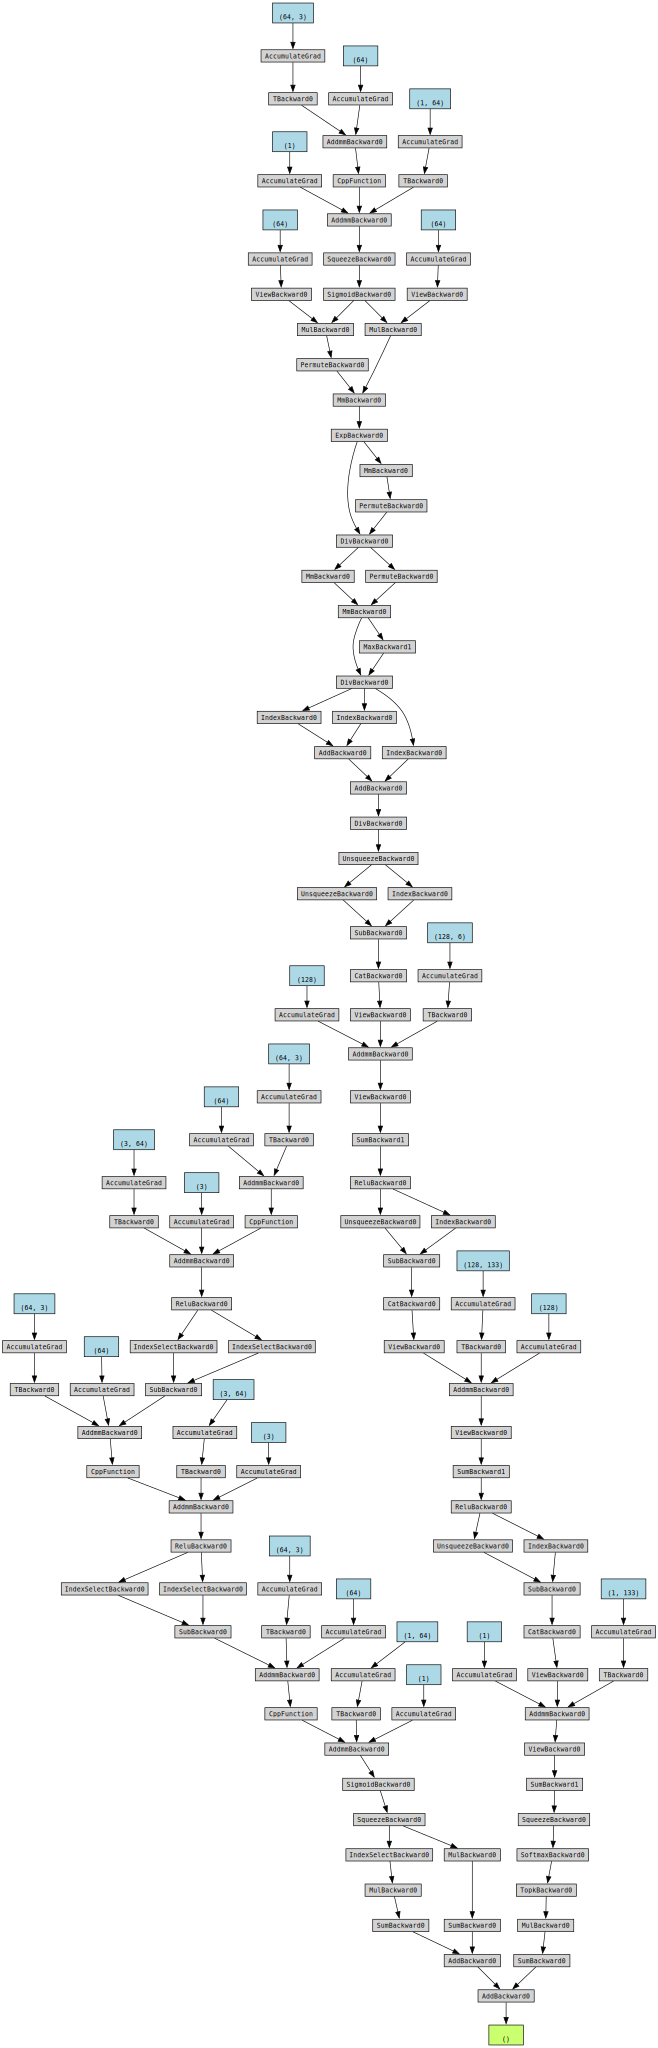

In [2]:
import torch
import time

from mesh_dataset import MeshDataset
from torch.utils.data import DataLoader
from gnn_simplification_model import GNNSimplificationMesh
from loss.loss import total_loss
from tqdm import tqdm

torch.manual_seed(42)


def train():
    number_neigh_tri = 20

    # if len(graph._node)<20:
    #     raise Exception("Input mesh does not have enough vertices. (More than 20 is needed)")

    torch_dataset = MeshDataset("../3d_models/stl/")

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    gnn_model = GNNSimplificationMesh(number_neigh_tri, debug=False).to(device)
    optimizer = torch.optim.Adam(gnn_model.parameters(), lr=1e-5, weight_decay=0.99)


    for epoch in range(0, 1): 
        print(f'Starting epoch {epoch+1}')
        
        current_loss = 0.0
        start = time.time()
        for i, (torch_graph, triangles) in tqdm(enumerate(torch_dataset), total=len(torch_dataset), desc='Iterate data', leave=False):
            
            # optimizer.zero_grad()
            end = time.time()
            print('init input : ', end - start)
            selected_triangles = gnn_model(200, torch_graph)
            
            start = time.time()
            loss = total_loss(gnn_model.score_original_points, 
                              torch_graph.x, 
                              gnn_model.generated_graph_nodes, 
                              gnn_model.selected_triangles_probabilities, 
                              selected_triangles, 
                              gnn_model.original_barycenters)
            end = time.time()
            print('loss : ', end - start)
            display(torchviz.make_dot(loss))
            
            # current_loss += loss.item()
            # if i % 500 == 499:
            #     print('Loss after mini-batch %5d: %.3f' %
            #         (i + 1, current_loss / 500))
            #     current_loss = 0.0
            
            # start = time.time()
    
    # start = time.time()
    # loss.backward()        
    # end = time.time()
    # print('backward : ', end - start)

    # for name, param in gnn_model.named_parameters():
    #     print(name)
    #     print(param.shape)
    #     # print(param.grad)
    #     print('')

    # optimizer.step()            
    # print('Training process has finished.')

train()